# Linear Regression

# Data1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("C:/Users/surek/Downloads/1_2015.csv") 
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
data.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [8]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

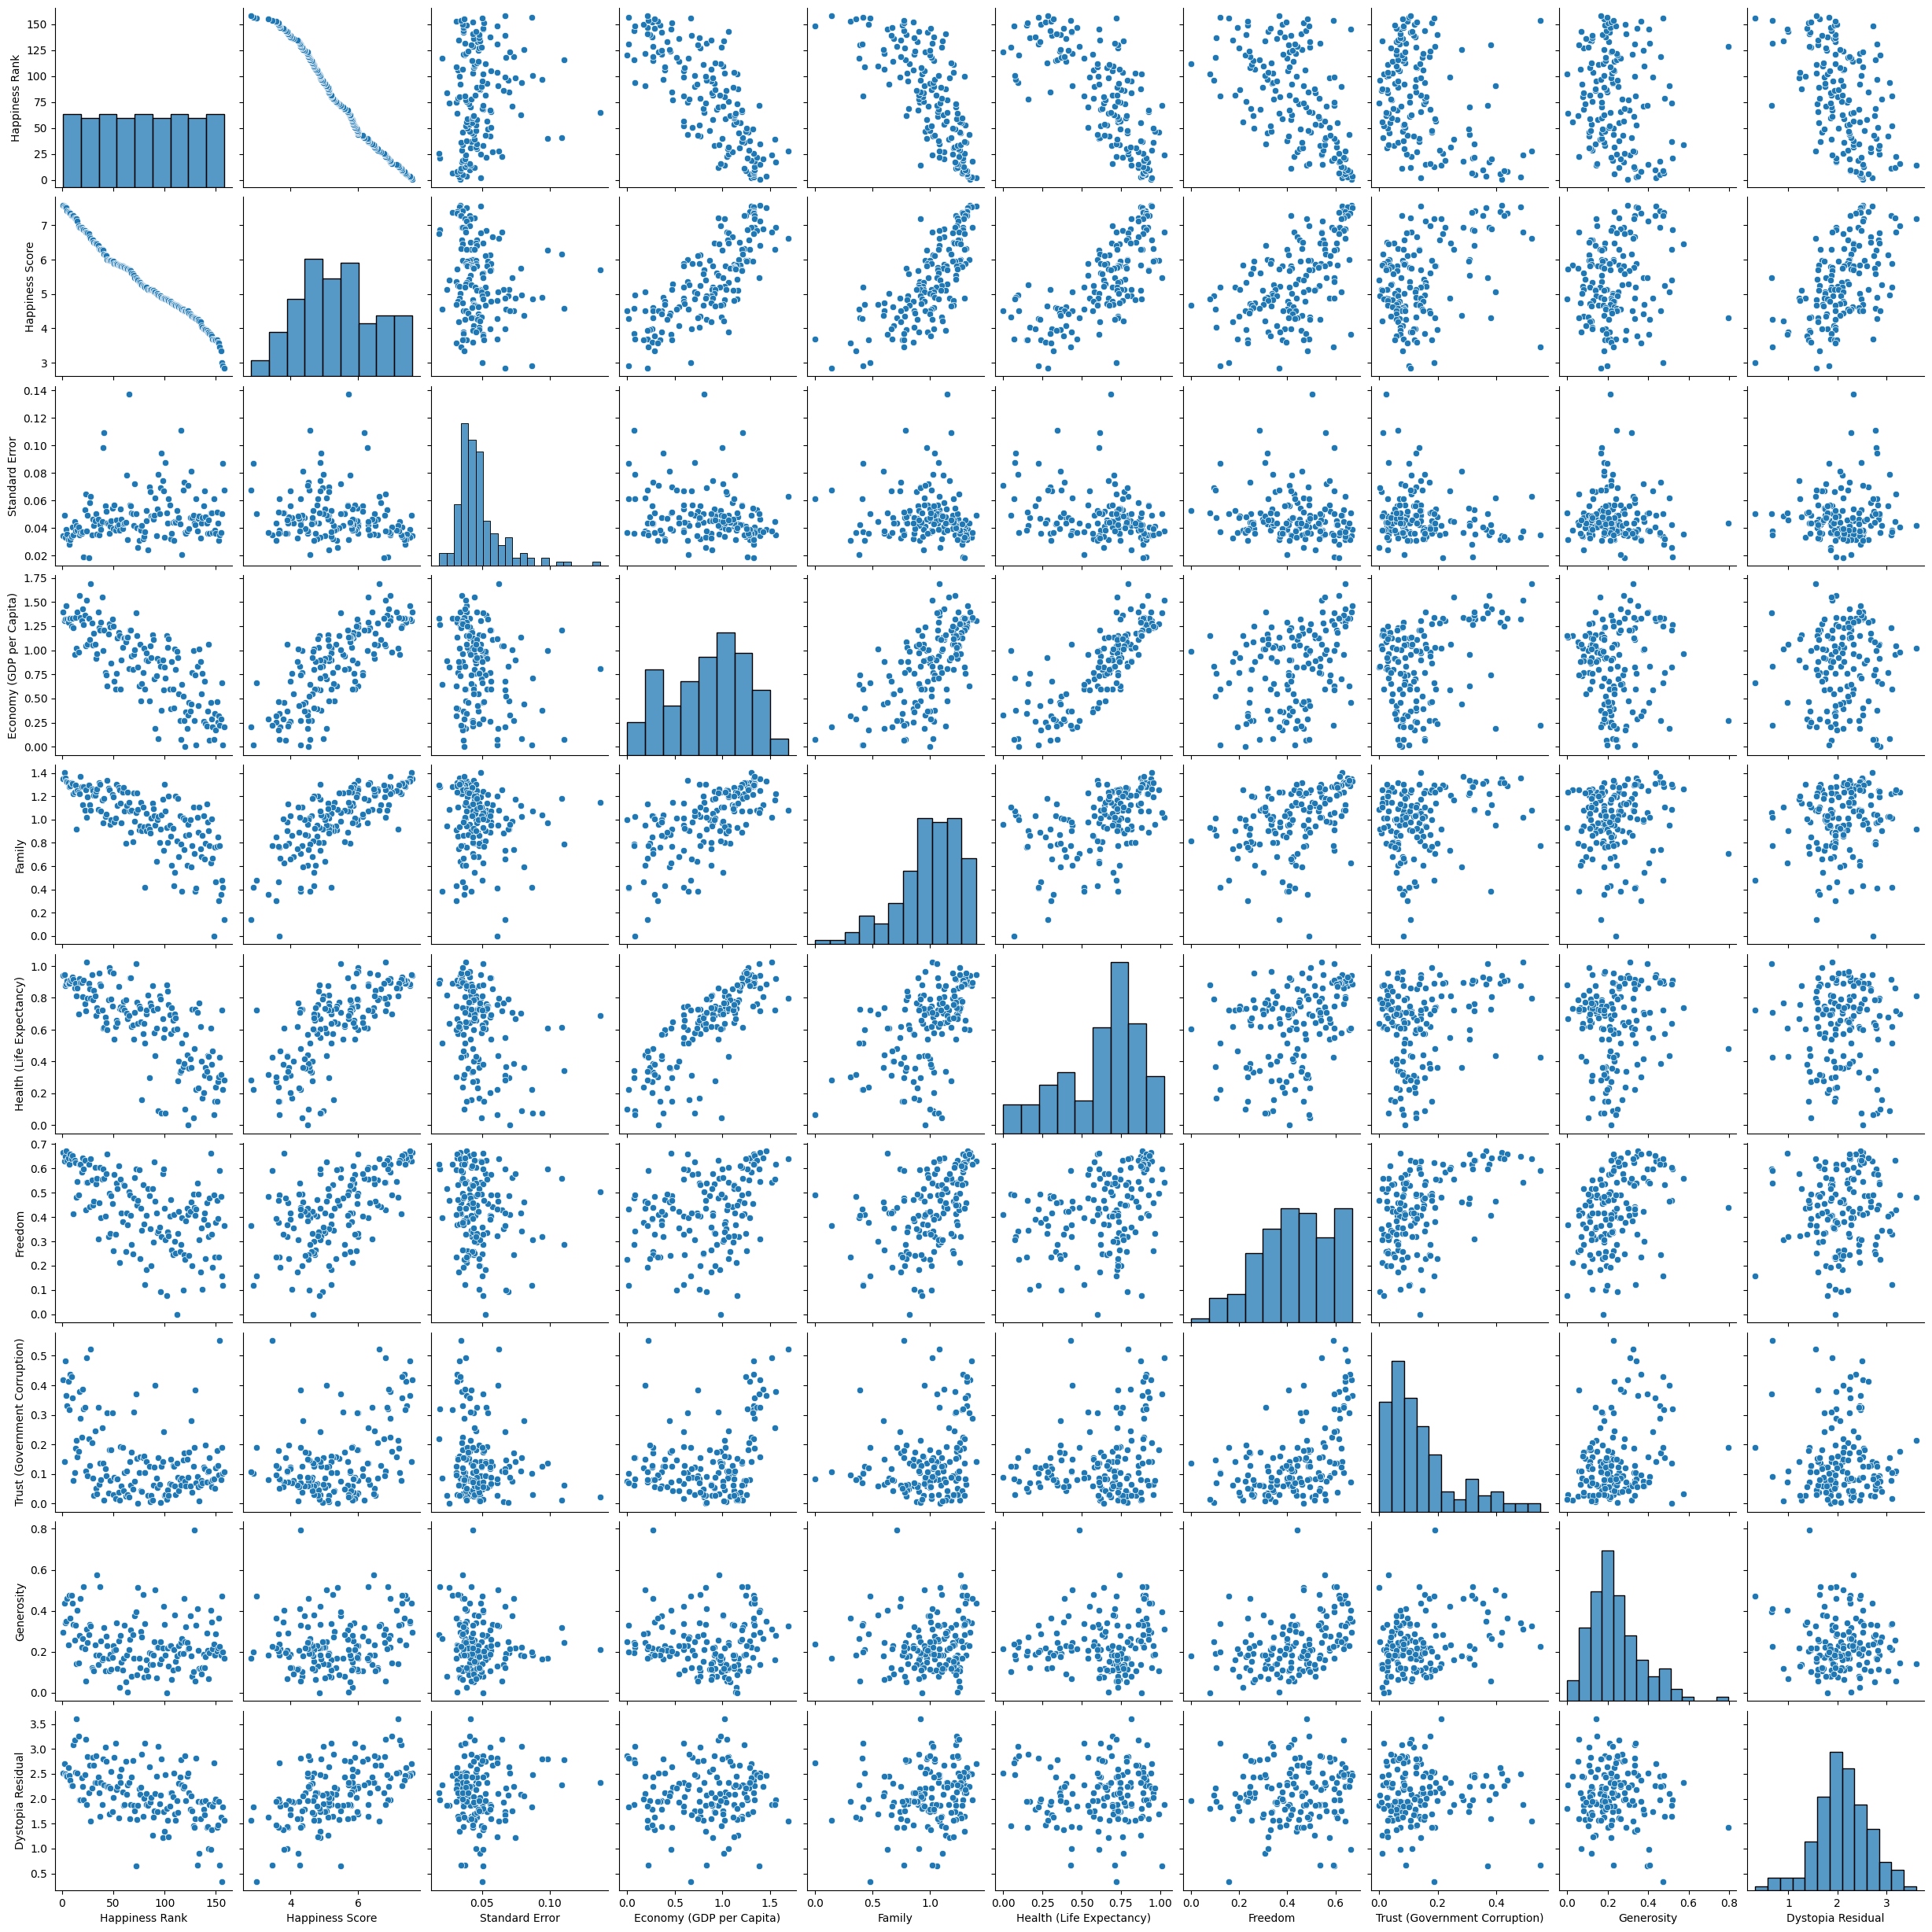

In [9]:
sns.pairplot(data)

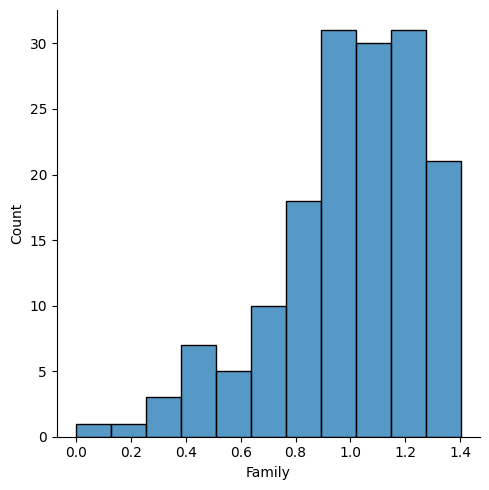

In [10]:
sns.displot(data['Family'])

In [11]:
df1 = data[['Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]
df1

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


<Axes: >

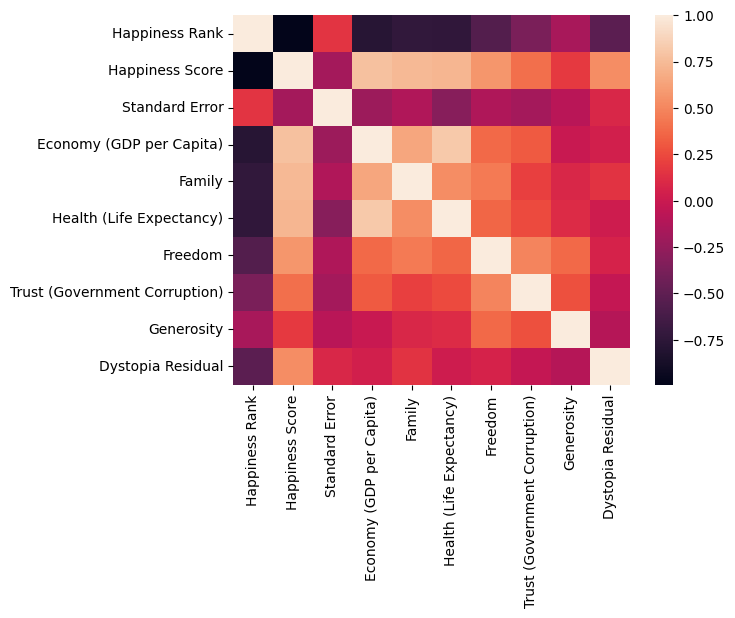

In [12]:
sns.heatmap(df1.corr())

# Model Building for Data1

In [13]:
X = data[['Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]
Y = data['Family']

In [14]:
pip install sklearn

In [15]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [18]:
predx=lr.predict(X_test)
print(predx)

[8.69080000e-01 1.27385000e+00 7.47000000e-01 9.29330000e-01
 1.10464000e+00 1.22668000e+00 1.11862000e+00 9.98760000e-01
 9.05570000e-01 1.26999000e+00 1.00964000e+00 1.25596000e+00
 1.15102000e+00 9.85210000e-01 1.20643000e+00 7.96240000e-01
 7.89680000e-01 9.99030000e-01 6.40950000e-01 9.12260000e-01
 9.46750000e-01 1.29937000e+00 5.30891627e-14 8.51880000e-01
 8.00010000e-01 9.46320000e-01 1.03516000e+00 7.60620000e-01
 8.04340000e-01 9.05280000e-01 1.26038000e+00 9.53480000e-01
 6.04290000e-01 1.23617000e+00 3.02850000e-01 1.29704000e+00
 1.07008000e+00 1.08708000e+00 1.16594000e+00 9.78410000e-01
 1.36058000e+00 1.17202000e+00 1.28548000e+00 9.16120000e-01
 1.00120000e+00 1.18354000e+00 3.53860000e-01 1.30477000e+00]


In [19]:
print(lr.score(X_test,Y_test))

1.0


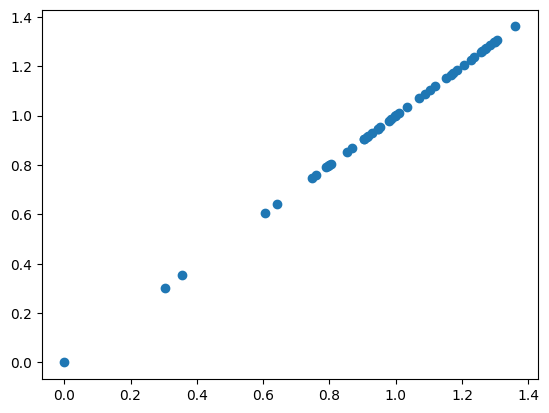

In [20]:
plt.scatter(Y_test,predx)

# Data2

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
data1 = pd.read_csv("C:/Users/surek/Downloads/4_Drug200.csv")
data1

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [22]:
data1.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [24]:
data1.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [25]:
data1['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [26]:
BP = {'BP':{"HIGH":2,"LOW":0,"NORMAL":1}}
data1 = data1.replace(BP)
data1

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,2,HIGH,25.355,drugY
1,47,M,0,HIGH,13.093,drugC
2,47,M,0,HIGH,10.114,drugC
3,28,F,1,HIGH,7.798,drugX
4,61,F,0,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,0,HIGH,11.567,drugC
196,16,M,0,HIGH,12.006,drugC
197,52,M,1,HIGH,9.894,drugX
198,23,M,1,NORMAL,14.020,drugX


In [27]:
data1['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [28]:
Cholesterol={"Cholesterol":{"HIGH":2,"LOW":0,"NORMAL":1}}
data1=data1.replace(Cholesterol)
data1

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,2,2,25.355,drugY
1,47,M,0,2,13.093,drugC
2,47,M,0,2,10.114,drugC
3,28,F,1,2,7.798,drugX
4,61,F,0,2,18.043,drugY
...,...,...,...,...,...,...
195,56,F,0,2,11.567,drugC
196,16,M,0,2,12.006,drugC
197,52,M,1,2,9.894,drugX
198,23,M,1,1,14.020,drugX


In [29]:
data1=data1.drop(["Sex","Drug"],axis=1)
data1

,Age,BP,Cholesterol,Na_to_K
0,23,2,2,25.355
1,47,0,2,13.093
2,47,0,2,10.114
3,28,1,2,7.798
4,61,0,2,18.043
...,...,...,...,...
195,56,0,2,11.567
196,16,0,2,12.006
197,52,1,2,9.894
198,23,1,1,14.020


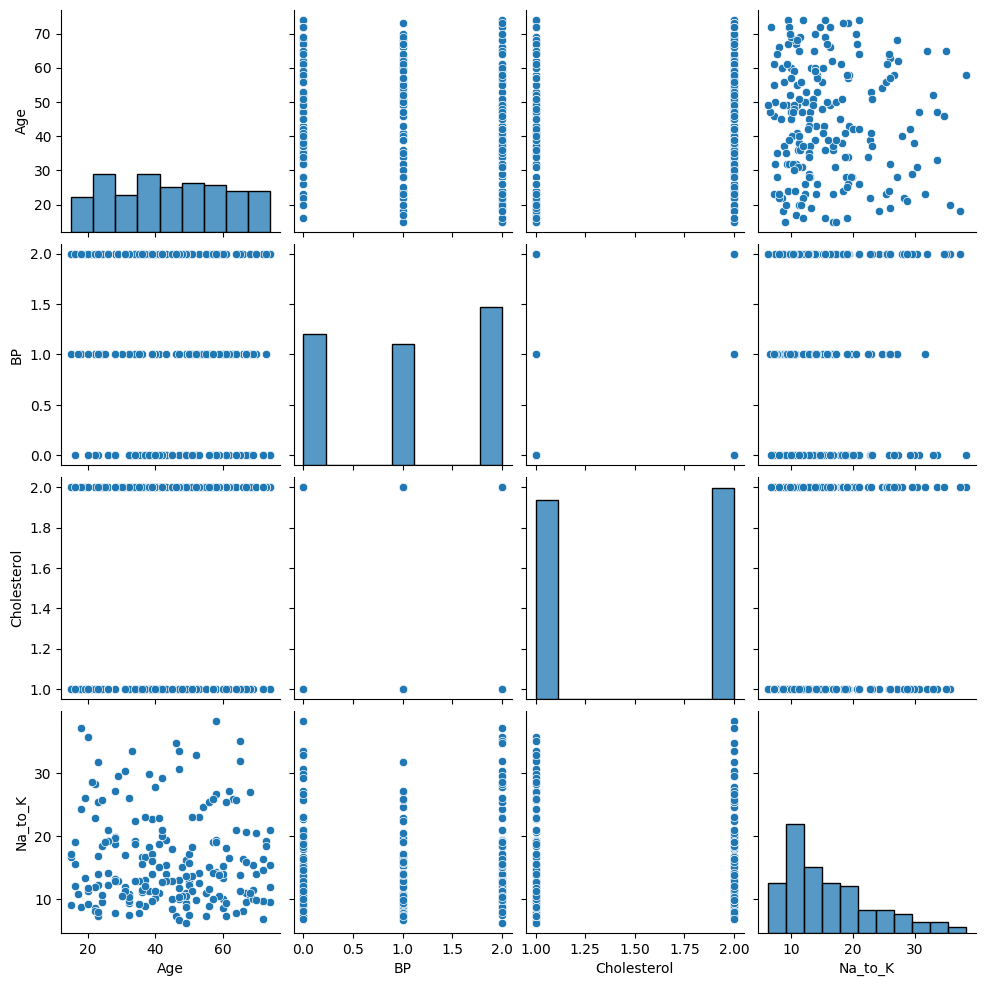

In [30]:
sns.pairplot(data1)

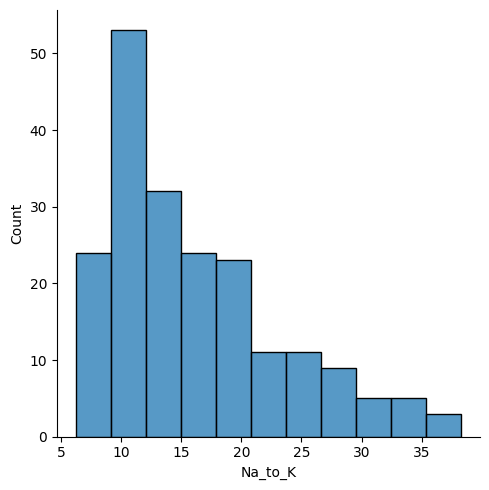

In [31]:
sns.displot(data1['Na_to_K'])

<Axes: >

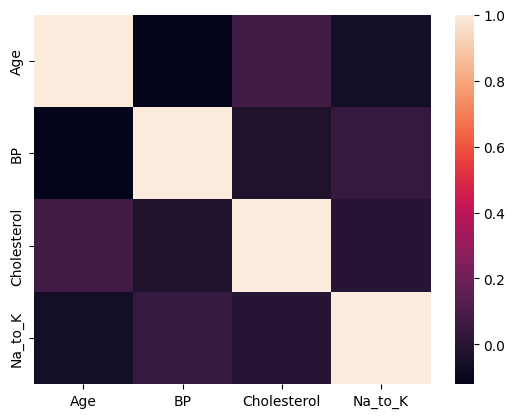

In [32]:
sns.heatmap(data1.corr())

In [33]:
x = data1[['Age','Cholesterol','Na_to_K']]
y = data1['BP']

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [35]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
predx=lr.predict(x_test)
#predy=lr.predict(y_test)
print(predx)
#print(predy)

[1.02178553 1.05833849 0.93974338 1.00183805 1.06437443 0.99601692
 1.14850604 1.21861179 0.90469708 0.9858068  1.00337084 1.0750772
 1.13917128 0.9785035  1.0696674  1.11743857 0.98524756 1.11546165
 0.88331772 1.01042427 1.02354659 1.05404244 0.90249426 1.06700764
 1.10062945 1.15081261 1.08831388 0.90597954 1.06064809 0.98511413
 0.92307644 1.1303906  0.86882924 0.92536504 0.93833205 1.19239088
 1.07666751 0.94885395 0.95299472 0.92187386 1.02134365 1.15482725
 0.97026264 1.04137662 0.97940355 1.11004842 0.88935911 1.09350897
 1.05882472 1.04589886 1.04647668 0.92404768 1.06608126 1.08203183
 1.09711651 0.99262804 0.99736706 0.97011171 1.01093685 1.01390662]


In [37]:
print(lr.score(x_test,y_test))

0.008610440156130106


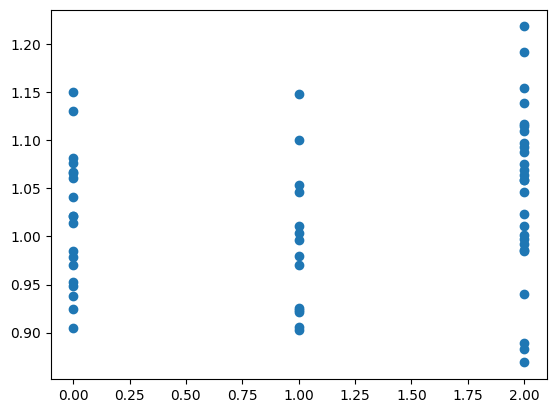

In [38]:
plt.scatter(y_test,predx)

# Data3

In [42]:
data3 = pd.read_csv(r"C:\Users\surek\Downloads\7_Uber.csv")
data3

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [43]:
data3.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [44]:
data3.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [45]:
data3.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [46]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [47]:
data3.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

# Random Forest

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [49]:
df1=pd.read_csv(r"C:\Users\surek\Downloads\C1_Ionosphere.csv")

In [50]:
df1

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
346,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
347,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
348,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [51]:
df1.describe()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
count,350.000000,350.0,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,0.891429,0.0,0.640330,0.044667,0.600350,0.116154,0.549284,0.120779,0.510453,0.181756,...,0.395643,-0.069928,0.542015,-0.068417,0.378919,-0.027013,0.352313,-0.002248,0.349829,0.015816
std,0.311546,0.0,0.498059,0.442032,0.520431,0.461443,0.493124,0.520816,0.507117,0.484482,...,0.579206,0.508675,0.516896,0.550411,0.576642,0.508425,0.572289,0.513491,0.523339,0.468338
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.471517,-0.065388,0.412555,-0.024868,0.209105,-0.053483,0.086785,-0.049003,...,0.000000,-0.323745,0.283612,-0.428992,0.000000,-0.234935,0.000000,-0.239347,0.000000,-0.161013
50%,1.000000,0.0,0.870795,0.016700,0.808620,0.021170,0.728000,0.015085,0.682430,0.017550,...,0.549175,-0.014915,0.708530,-0.017685,0.499215,0.000000,0.446875,0.000000,0.413115,0.000000
75%,1.000000,0.0,1.000000,0.194727,1.000000,0.335317,0.970445,0.451572,0.950555,0.536192,...,0.907165,0.157922,0.999972,0.154862,0.884572,0.154218,0.859490,0.200935,0.816778,0.172105
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1          350 non-null    int64  
 1   0          350 non-null    int64  
 2   0.99539    350 non-null    float64
 3   -0.05889   350 non-null    float64
 4   0.85243    350 non-null    float64
 5   0.02306    350 non-null    float64
 6   0.83398    350 non-null    float64
 7   -0.37708   350 non-null    float64
 8   1.1        350 non-null    float64
 9   0.03760    350 non-null    float64
 10  0.85243.1  350 non-null    float64
 11  -0.17755   350 non-null    float64
 12  0.59755    350 non-null    float64
 13  -0.44945   350 non-null    float64
 14  0.60536    350 non-null    float64
 15  -0.38223   350 non-null    float64
 16  0.84356    350 non-null    float64
 17  -0.38542   350 non-null    float64
 18  0.58212    350 non-null    float64
 19  -0.32192   350 non-null    float64
 20  0.56971   

In [53]:
g = {"g":{"g":1,"b":2}}
df1 = df1.replace(g)
df1

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,2
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,2
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
346,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
347,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
348,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [54]:
df1["g"].value_counts()

g
1    224
2    126
Name: count, dtype: int64

In [55]:
x = df1.drop("g",axis=1)
y = df1["g"]

In [ ]:
X = x

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
rf = RandomForestClassifier()

In [61]:
params ={"max_depth":[1,2,3,4,5],
         "min_samples_leaf":[2,4,6,8,10],
         "n_estimators":[1,3,5,7]
}

In [68]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=rf,param_grid=params,cv=2,scoring='accuracy')
gs.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'n_estimators': [1, 3, 5, 7]},
             scoring='accuracy')

In [69]:
rf_best = gs.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=5)

[Text(0.36363636363636365, 0.9166666666666666, 'x[30] <= 0.185\ngini = 0.435\nsamples = 138\nvalue = [143, 67]\nclass = Yes'),
 Text(0.18181818181818182, 0.75, 'x[4] <= 0.117\ngini = 0.499\nsamples = 48\nvalue = [35, 38]\nclass = No'),
 Text(0.09090909090909091, 0.5833333333333334, 'gini = 0.0\nsamples = 20\nvalue = [0, 31]\nclass = No'),
 Text(0.2727272727272727, 0.5833333333333334, 'x[17] <= -0.84\ngini = 0.278\nsamples = 28\nvalue = [35, 7]\nclass = Yes'),
 Text(0.18181818181818182, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [0, 5]\nclass = No'),
 Text(0.36363636363636365, 0.4166666666666667, 'x[14] <= -0.407\ngini = 0.102\nsamples = 24\nvalue = [35, 2]\nclass = Yes'),
 Text(0.2727272727272727, 0.25, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Yes'),
 Text(0.45454545454545453, 0.25, 'x[31] <= 0.275\ngini = 0.056\nsamples = 22\nvalue = [34, 1]\nclass = Yes'),
 Text(0.36363636363636365, 0.08333333333333333, 'gini = 0.0\nsamples = 17\nvalue = [27, 0]\nclass = Yes'),
 T

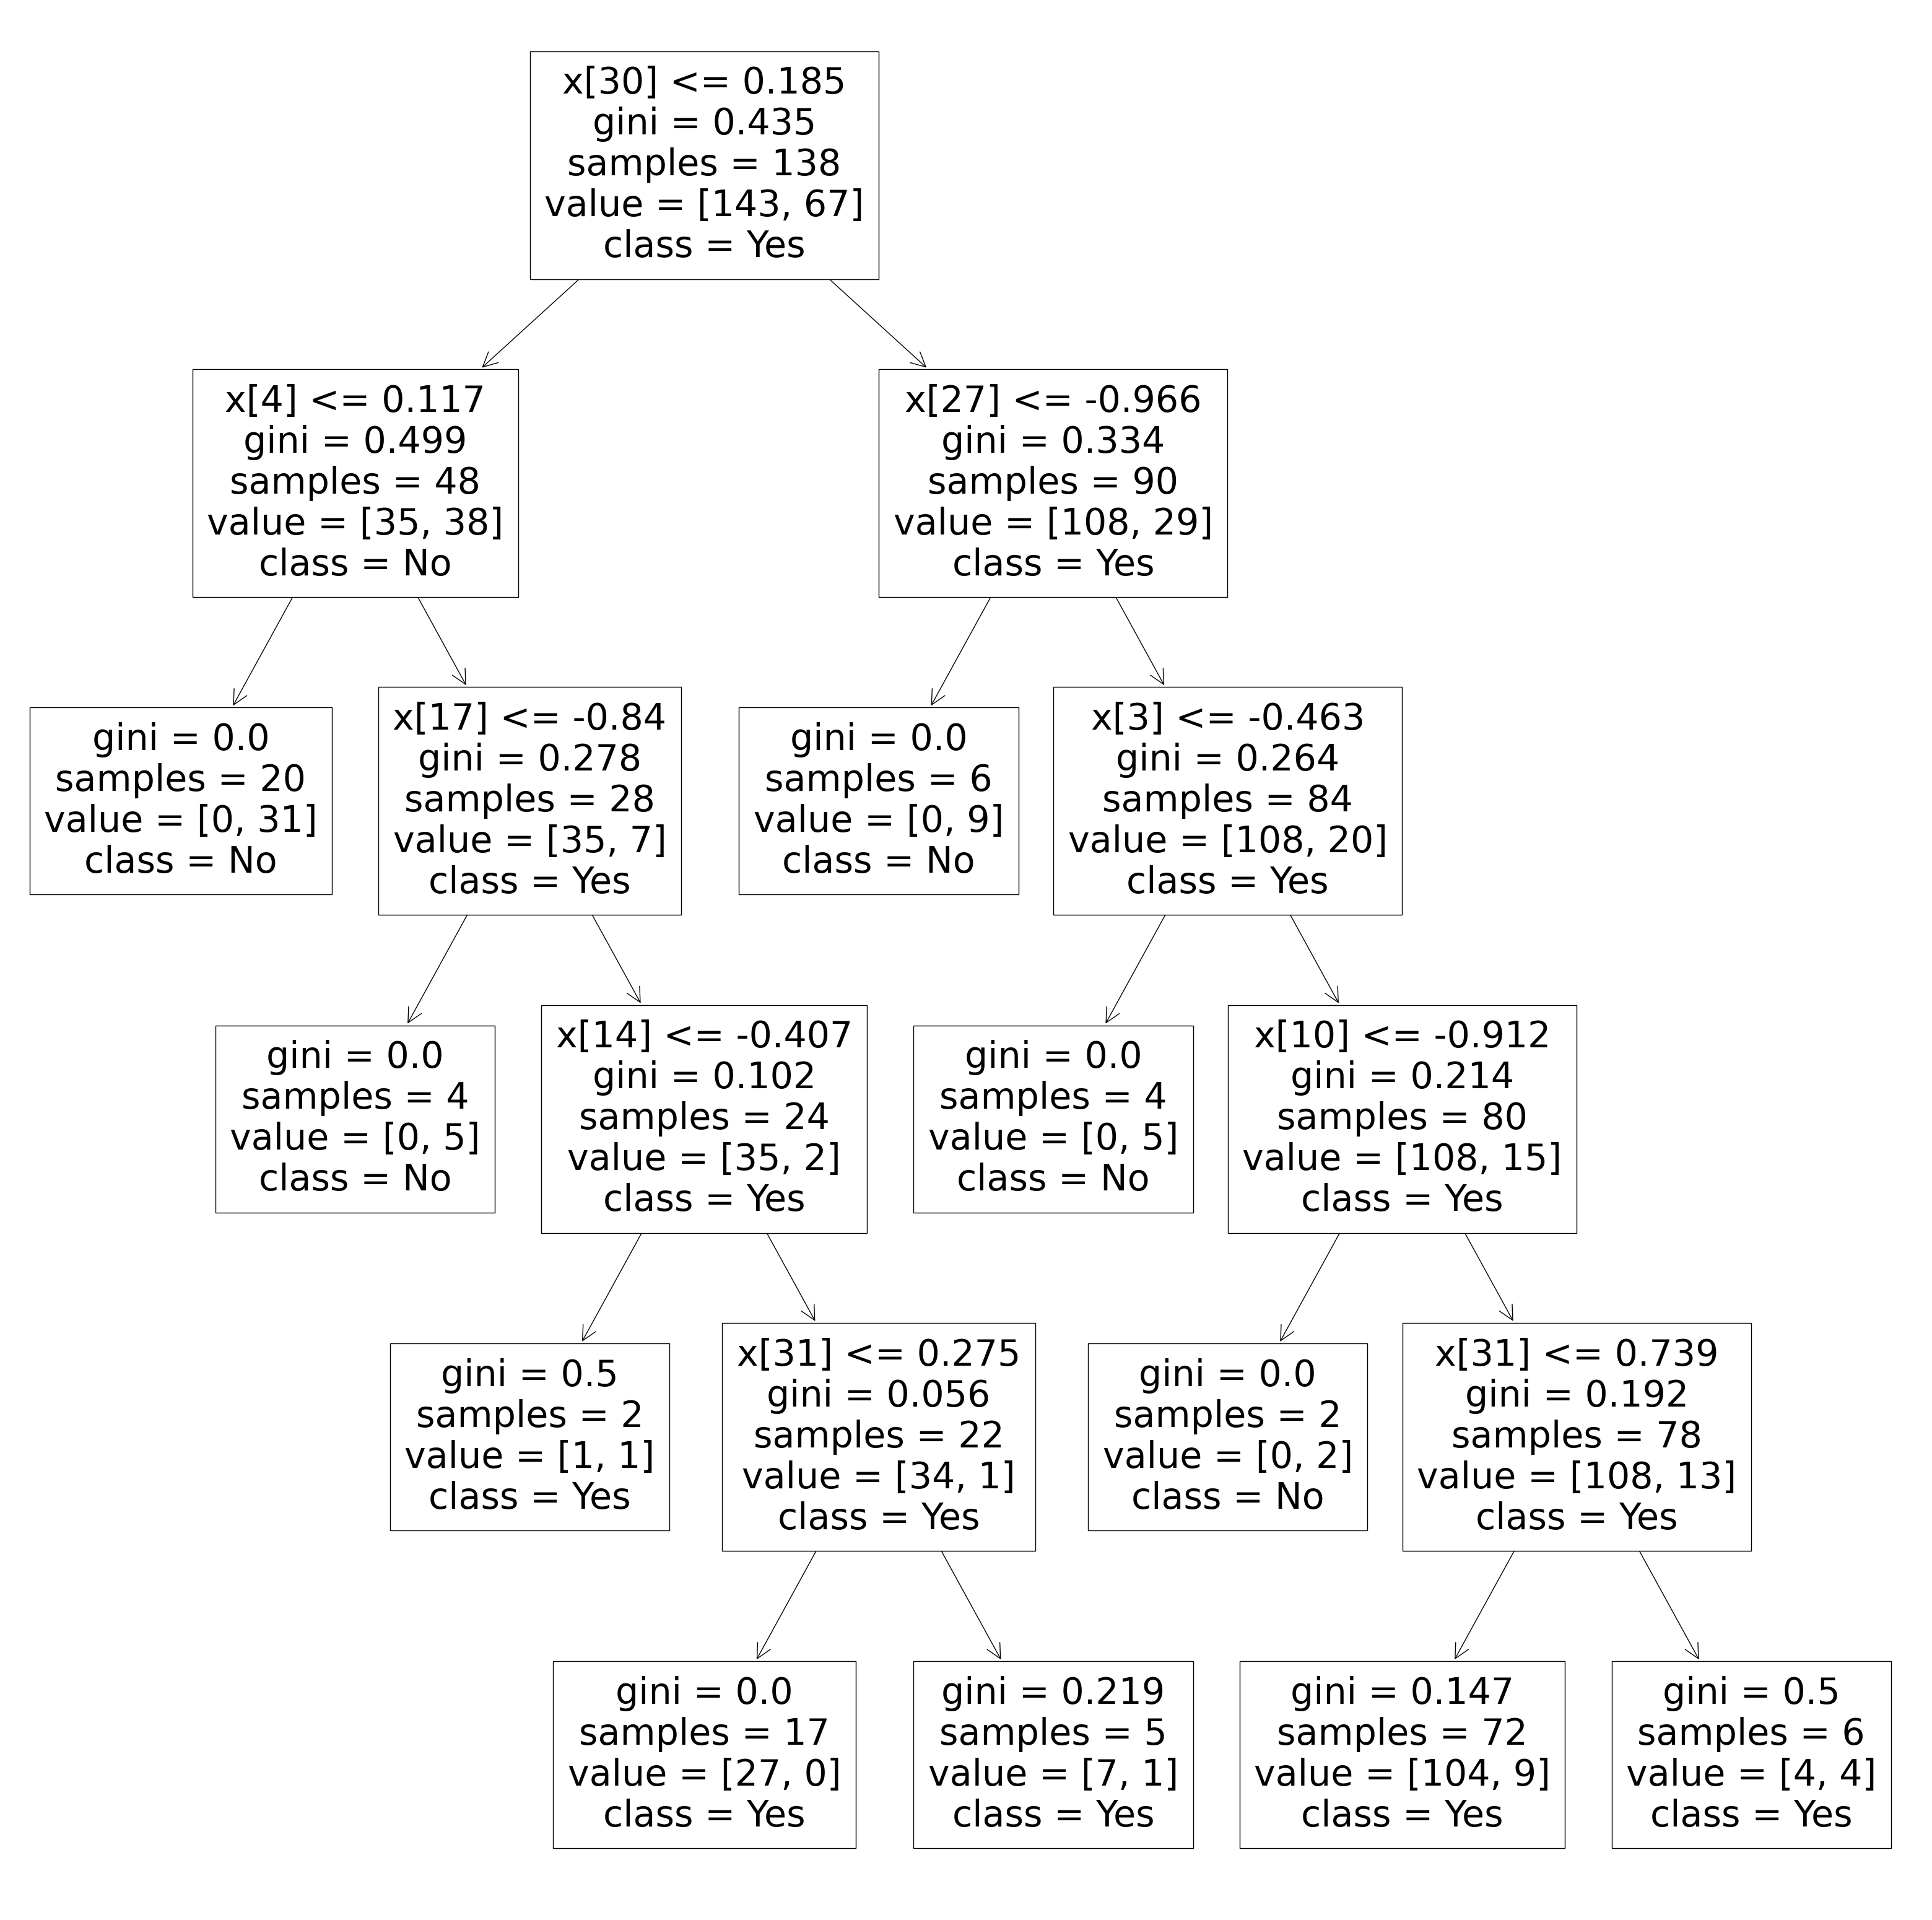

In [86]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,40))
plot_tree(rf_best.estimators_[4],feature_names=None,class_names=["Yes","No"])

# Random Forest for data2

In [87]:
df2 = pd.read_csv(r"C:\Users\surek\Downloads\C10_Loan1.csv")

In [88]:
df2

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,Yes,Single,125,No
1,No,Married,100,No
2,No,Single,70,No
3,Yes,Married,120,No
4,No,Divorced,95,Yes
5,No,Married,60,No
6,Yes,Divorced,220,No
7,No,Single,85,Yes
8,No,Married,75,No
9,No,Single,90,Yes


In [89]:
df2.describe()

,Annual Income
count,10.000000
mean,104.000000
std,45.631373
min,60.000000
25%,77.500000
50%,92.500000
75%,115.000000
max,220.000000


In [90]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Home Owner          10 non-null     object
 1   Marital Status      10 non-null     object
 2   Annual Income       10 non-null     int64 
 3   Defaulted Borrower  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 452.0+ bytes


In [109]:
Home_owner = {"Home Owner":{"Yes":1,"No":2}}
df2 = df2.replace("Home Owner")
Defaulted_Borrower = {"Defaulted Borrower":{"Yes":1,"No":2}}
df2 = df2.replace("Defaulted Borrower")
Marital_Status = {"Marital Status":{"Divorced":0,"Single":1,"Married":2}}
df2 = df2.replace("Martial Status")
df2

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,Yes,Single,125,No
1,No,Married,100,No
2,No,Single,70,No
3,Yes,Married,120,No
4,No,Divorced,95,Yes
5,No,Married,60,No
6,Yes,Divorced,220,No
7,No,Single,85,Yes
8,No,Married,75,No
9,No,Single,90,Yes


In [110]:
df2["Home Owner"].value_counts()

Home Owner
No     7
Yes    3
Name: count, dtype: int64

In [111]:
df2["Defaulted Borrower"].value_counts()

Defaulted Borrower
No     7
Yes    3
Name: count, dtype: int64

In [112]:
x = df2.drop("Marital Status",axis = 1)
y = df2["Marital Status"]

In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [123]:
rf = RandomForestClassifier()

In [124]:
params ={"max_depth":[1,2,3,4,5],
         "min_samples_leaf":[2,4,6,8,10],
         "n_estimators":[1,3,5,7]
}

In [125]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=rf,param_grid=params,cv=2,scoring='accuracy')
gs.fit(x_train,y_train)

ValueError: 
All the 200 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\surek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\surek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\surek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\surek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\surek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\surek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 917, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\surek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\surek\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'No'

--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\surek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\surek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\surek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\surek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\surek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\surek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 917, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\surek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\surek\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Yes'
